<font size="4" color="orange"><b>1 - Carregando pacotes</b></font>

In [17]:
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from scipy import stats
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import skew, kurtosis
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

<font size="4" color="orange"><b>1.1 - Verificando versões dos pacotes</b></font>

In [37]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import imblearn
from lazypredict import __version__ as lazypredict_version


# Exibir as versões
print("sklearn version:", sklearn.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__) 
print("seaborn version:", sns.__version__)
print("scipy version:", scipy.__version__)  
print("imblearn version:", imblearn.__version__)
print("lazypredict version:", lazypredict_version)



sklearn version: 1.0.2
numpy version: 1.21.5
pandas version: 1.4.4
matplotlib version: 3.5.2
seaborn version: 0.11.2
scipy version: 1.9.1
imblearn version: 0.12.0
lazypredict version: 0.2.12


<font size="4" color="orange"><b>1.2 - Verificando a Versão Python</b></font>

In [38]:
import sys
print("Python version:", sys.version)


Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


<font size="4" color="orange"><b>1.3 - Carregando Dataset</b></font>

In [39]:
# Carregando Dataset do UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df = pd.read_csv(url)
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M               298.10                   308.60   
1    2     L47181    L               298.20                   308.70   
2    3     L47182    L               298.10                   308.50   
3    4     L47183    L               298.20                   308.60   
4    5     L47184    L               298.20                   308.70   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551        42.80                0                0    0   
1                    1408        46.30                3                0    0   
2                    1498        49.40                5                0    0   
3                    1433        39.50                7                0    0   
4                    1408        40.00                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

 
 
 
 
 O dataset contem informaçõe sobre condições de trabalho e parametros de uso de ferramentas 
 
 O objetivo desse estudo é criar um algoritimo de classificação para prever falhas nas ferramentas de usinagem de acordo com as condições e parametros de trabalho. 
 
 
 O conjunto de dados contém as seguintes variáveis:
1.	UDI: Identificador único.
2.	Product ID: Identificador do produto.
3.	Type: Tipo de produto (L, M, ou H).
4.	Air temperature [K]: Temperatura do ar em Kelvin.
5.	Process temperature [K]: Temperatura do processo em Kelvin.
6.	Rotational speed [rpm]: Velocidade de rotação em rotações por minuto.
7.	Torque [Nm]: Torque em Newton-metros.
8.	Tool wear [min]: Desgaste da ferramenta em minutos.
9.	Machine Failure (Target) : Variável alvo a ser prevista.
10.	Failure Type: Tipo de falha (No Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Tool Wear Failure, Random Failures).

<font size="4" color="orange"><b>2 - Análise Exploratória</b></font>

In [40]:
# Verificando o formato
type(df)

pandas.core.frame.DataFrame

In [41]:
# Nomes das variáveis
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [42]:
#Primeiras analises
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
df['Product ID'].nunique()



10000

In [9]:
# Dimensão do dataset
df.shape

(10000, 14)

<font size="4" color="orange"><b>2.1 - Transformação das variáveis “'TWF','HDF','PWF','OSF','RNF'” em categóricas.  </b></font>

In [4]:
# Seleção de colunas para transformar em variáveis categóricas
colunas = ['TWF','HDF','PWF','OSF','RNF']
df[colunas] = df[colunas].astype('category')

In [11]:
#exploração de variáveis numéricas
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,300.00,310.01,1538.78,39.99,107.95,0.03
std,2886.90,2.00,1.48,179.28,9.97,63.65,0.18
min,1.00,295.30,305.70,1168.00,3.80,0.00,0.00
25%,2500.75,298.30,308.80,1423.00,33.20,53.00,0.00
50%,5000.50,300.10,310.10,1503.00,40.10,108.00,0.00
75%,7500.25,301.50,311.10,1612.00,46.80,162.00,0.00
max,10000.00,304.50,313.80,2886.00,76.60,253.00,1.00


In [12]:
# Contagem de numeros de falhas na coluna 'Machine Failure'
contagem_negativos = (df['Machine failure'] == 0).sum()
contagem_falhas = (df['Machine failure'] == 1).sum()
print(f"Quantidade de registros sem indicação de falhas: {contagem_negativos}")
print(f"Quantidade de registros com indicação de falhas: {contagem_falhas}")

Quantidade de registros sem indicação de falhas: 9661
Quantidade de registros com indicação de falhas: 339


In [13]:
# Calculando a proporção de registros de falhas dentro do dataset (avaliar necessidade de balanceamento) 

proporcao = (contagem_falhas / len(df))*100
print(f"Proporção: {proporcao}% de observações com falha")

Proporção: 3.39% de observações com falha


In [14]:
# Contagem de falhas para cada coluna individualmente
contagem_falhas_machine_failure = (df['Machine failure'] == 1).sum()  
contagem_falhas_twf = (df['TWF'] ==1).sum()
contagem_falhas_hdf = (df['HDF']==1).sum()
contagem_falhas_pwf = (df['PWF']==1).sum()
contagem_falhas_osf = (df['OSF']==1).sum()
contagem_falhas_rnf = (df['RNF']==1).sum()

# Exibindo as contagens
print("Machine Failure:")
print(contagem_falhas_machine_failure)
print("\nTWF:")
print(contagem_falhas_twf)
print("\nHDF:")
print(contagem_falhas_hdf)
print("\nPWF:")
print(contagem_falhas_pwf)
print("\nOSF:")
print(contagem_falhas_osf)
print("\nRNF:")
print(contagem_falhas_rnf)

Machine Failure:
339

TWF:
46

HDF:
115

PWF:
95

OSF:
98

RNF:
19


 Nota-se que a quantidade de falhas por categoria é maior que o numero de registros em 'Machine Failure', 
logo se nota que uma falha na coluna 'Machine Failure' pode ter mais de uma categoria de falha 

<font size="4" color="orange"><b> 2.2 - Aplicando Hot Encoder na Variável 'Type'</b></font>

In [5]:
# criando novo dataset para analise e transformações posteriores
dataset = df

In [6]:
# Selecionando as canditadas a variaveis explanatórias
# x = df.drop('Machine failure', axis=1)
x = dataset[['Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']]
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.10,308.60,1551,42.80,0
1,L,298.20,308.70,1408,46.30,3
2,L,298.10,308.50,1498,49.40,5
3,L,298.20,308.60,1433,39.50,7
4,L,298.20,308.70,1408,40.00,9


In [7]:
#transformando a variavel Categorica em numero inteiro utilizando o hot enconding.

x1 = x[['Type']]

# Aplicando o HotEncoder para transformar as variáveis categoricas de uma unica linhas em três 
# variáveis diferentes.
hot_encoder = OneHotEncoder(sparse=False)
type_transformado = hot_encoder.fit_transform(x1)

# Dropando a coluna "Type" e adicionando a nova variavel com os novas colunas e labels.
type_encoded_df = pd.DataFrame(type_transformado, columns=hot_encoder.get_feature_names_out(['Type']))
x = pd.concat([x.drop('Type', axis=1), type_encoded_df], axis=1) 


In [18]:
x.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.10,308.60,1551,42.80,0,0.00,0.00,1.00
1,298.20,308.70,1408,46.30,3,0.00,1.00,0.00
2,298.10,308.50,1498,49.40,5,0.00,1.00,0.00
3,298.20,308.60,1433,39.50,7,0.00,1.00,0.00
4,298.20,308.70,1408,40.00,9,0.00,1.00,0.00


In [8]:
y = dataset['Machine failure']
valores_distintos = y.unique()
print("\n Os valores presentes na variável categórica são : ", valores_distintos)


 Os valores presentes na variável categórica são :  [0 1]


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [9]:
#concatenando preditoras e target para avaliação da correlação
dataset_hot = pd.concat([x,y], axis = 1)
dataset_hot.head


<bound method NDFrame.head of       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298.10                   308.60                    1551   
1                  298.20                   308.70                    1408   
2                  298.10                   308.50                    1498   
3                  298.20                   308.60                    1433   
4                  298.20                   308.70                    1408   
...                   ...                      ...                     ...   
9995               298.80                   308.40                    1604   
9996               298.90                   308.40                    1632   
9997               299.00                   308.60                    1645   
9998               299.00                   308.70                    1408   
9999               299.00                   308.70                    1500   

      Torque [Nm]  Tool wear [min

In [10]:
dataset_hot.shape

(10000, 9)

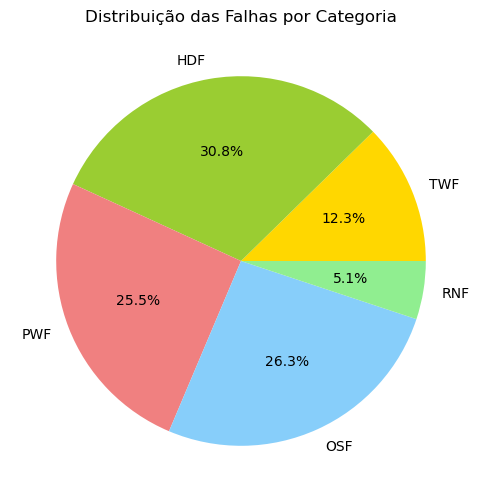

In [23]:
# Visualização das falhas por categoria
labels = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
sizes = [contagem_falhas_twf, contagem_falhas_hdf, contagem_falhas_pwf, contagem_falhas_osf, contagem_falhas_rnf]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']


# Grafico de pizza 
plt.figure(figsize=(8, 6))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribuição das Falhas por Categoria')
plt.show()

<font size="4" color="orange"><b> 2.3 - Verificando a distribuição das variáveis numéricas</b></font>

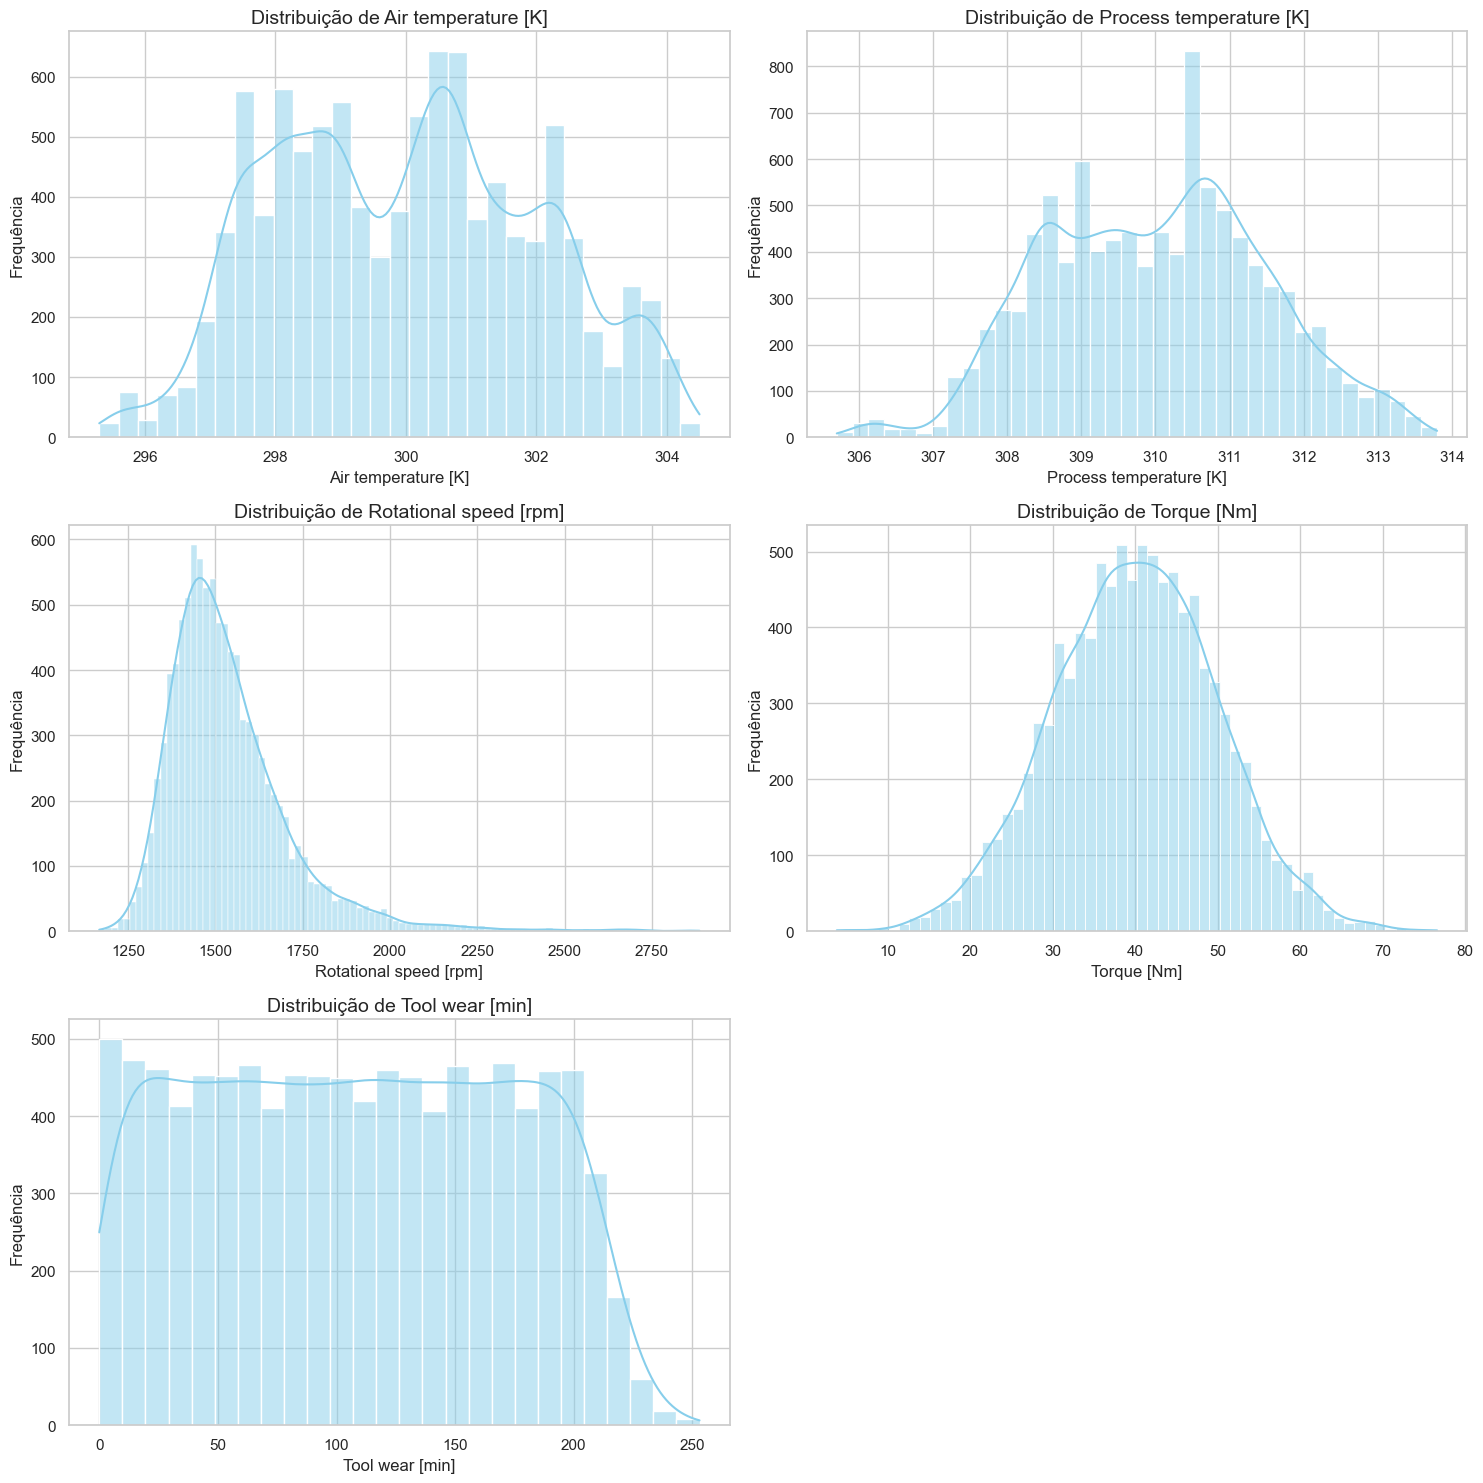

In [11]:
# Variáveis a serem analisadas
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Configurações de estilo do gráfico
sns.set(style='whitegrid')

# Criar uma figura com subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plotar histogramas com estimativa de densidade (KDE) para cada coluna
for i, col in enumerate(columns):
    sns.histplot(dataset_hot[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

# Remover o último subplot vazio, se houver
if len(columns) < len(axes):
    fig.delaxes(axes[-1])

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


<font size="4" color="orange"><b>2.4 - Avaliando o formato da distribuição dos dados em torno da média</b></font>

Curtose: Mede a "altitude" e a "largura" das caudas da distribuição em comparação com uma distribuição normal. Indica a presença de valores extremos.


Skewness: Mede a simetria da distribuição em torno da média. Indica a inclinação da distribuição.

In [25]:
variaveis = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

skewness_results = {}
kurtosis_results = {}

# Calcular skewness e kurtosis para cada variável
for var in variaveis:
    skewness_results[var] = skew(dataset_hot[var])
    kurtosis_results[var] = kurtosis(dataset_hot[var])

# Exibir os resultados
print("Skewness:")
for var, value in skewness_results.items():
    print(f"{var}: {value}")

print("\nKurtosis:")
for var, value in kurtosis_results.items():
    print(f"{var}: {value}")

Skewness:
Air temperature [K]: 0.11425677871921017
Process temperature [K]: 0.015025013585136188
Rotational speed [rpm]: 1.9928720166048546
Torque [Nm]: -0.009515168291199652
Tool wear [min]: 0.027288145044006527

Kurtosis:
Air temperature [K]: -0.8361436902603159
Process temperature [K]: -0.5000844728185414
Rotational speed [rpm]: 7.388649004260044
Torque [Nm]: -0.01383393464278937
Tool wear [min]: -1.166753784684031


Conclusões:

Temperatura do ar e do processo: Ambas as variáveis têm distribuições quase simétricas e achatadas.

Velocidade de rotação: Possui uma distribuição altamente assimétrica com uma cauda longa à direita e caudas pesadas, indicando a presença de outliers.

Torque: Distribuição quase simétrica e semelhante a uma distribuição normal.

Desgaste da ferramenta: Distribuição quase simétrica e ligeiramente achatada.

<font size="4" color="orange"><b>2.5 - Verificando outliers com bloxplot</b></font>

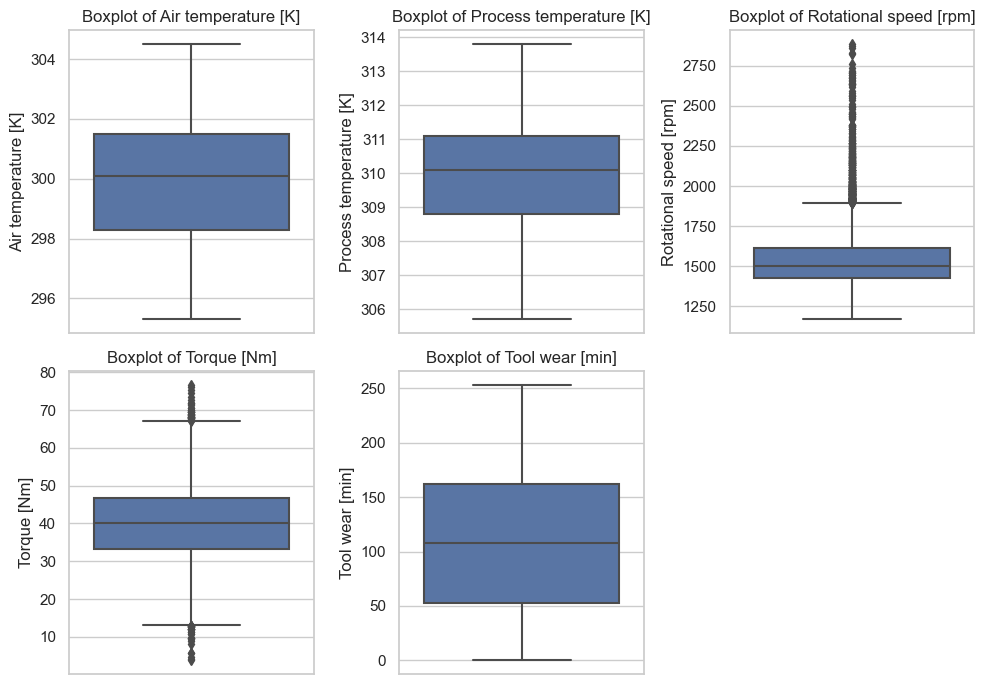

In [26]:
# Variáveis de interesse
variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plotar boxplots
plt.figure(figsize=(10, 7))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset_hot, y=var)
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [27]:


# Supondo que dataset_hot seja o seu DataFrame
variaveis = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Criar um dicionário para armazenar o número de outliers para cada variável
outliers_contagem = {}

for variavel in variaveis:
    # Calcular os quartis
    Q1 = dataset_hot[variavel].quantile(0.25)
    Q3 = dataset_hot[variavel].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar os outliers
    outliers = dataset_hot[(dataset_hot[variavel] < limite_inferior) | (dataset_hot[variavel] > limite_superior)]
    
    # Contar o número de outliers
    outliers_contagem[variavel] = outliers.shape[0]

# Exibir o número de outliers para cada variável
for variavel, count in outliers_contagem.items():
    print(f"{variavel}: {count} outliers")


Air temperature [K]: 0 outliers
Process temperature [K]: 0 outliers
Rotational speed [rpm]: 418 outliers
Torque [Nm]: 69 outliers
Tool wear [min]: 0 outliers


<font size="4" color="orange"><b>2.6 - Verificando outliers com o Z score</b></font>

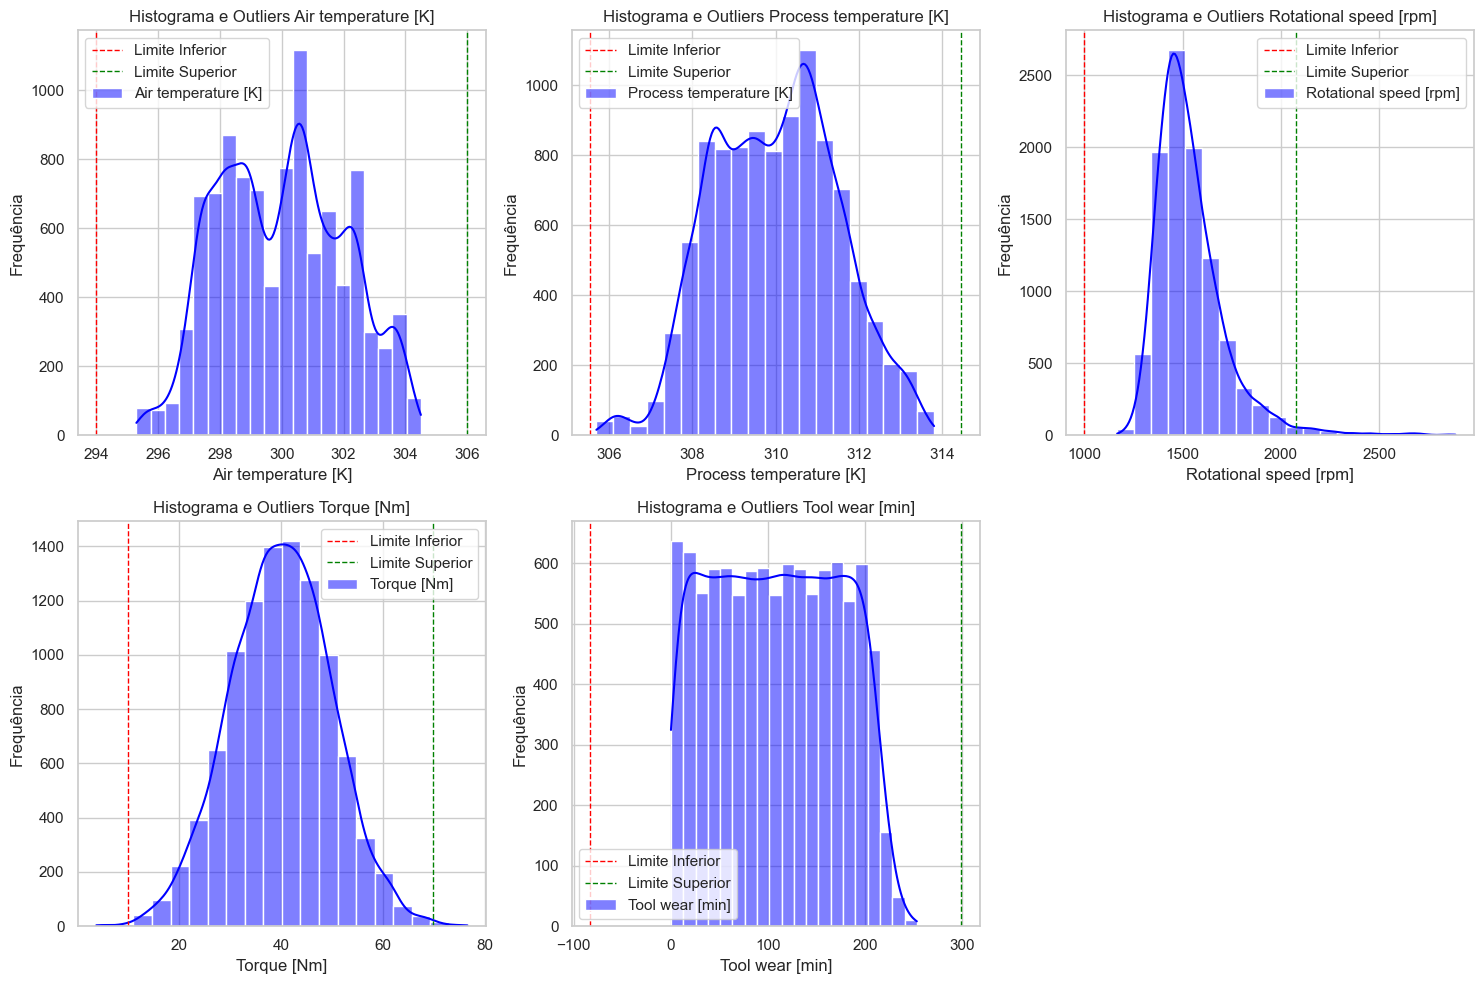

In [12]:
variaveis = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Função para encontrar os limites dos outliers com base em 3 desvios padrão
def funcao_outlier(dataset_hot):
    media = dataset_hot.mean()
    desvio_padrao = dataset_hot.std()
    limite_inferior = media - 3 * desvio_padrao
    limite_superior = media + 3 * desvio_padrao
    return limite_inferior, limite_superior

# Calcular os limites para cada variável
limites = {var: funcao_outlier(dataset_hot[var]) for var in variaveis}

# Criar histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset_hot[var], bins=20, kde=True, color='blue', label=var)
    limite_inferior, limite_superior = limites[var]
    plt.axvline(limite_inferior, color='red', linestyle='--', linewidth=1, label='Limite Inferior')
    plt.axvline(limite_superior, color='green', linestyle='--', linewidth=1, label='Limite Superior')
    plt.title(f'Histograma e Outliers {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.legend()
plt.tight_layout()
plt.show()

In [13]:
dataset_colunas = dataset_hot[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

# Calcular o Z-score para cada coluna
z_scores = np.abs(stats.zscore(dataset_colunas))

# Identificar outliers
outliers = (z_scores > 3)

# Contar o número de outliers por coluna
outliers_soma = np.sum(outliers, axis=0)

# Criar uma tabela com os resultados
outliers_df = pd.DataFrame({
    'Variável': dataset_colunas.columns,
    'QTD outliers': outliers_soma
})

# Exibir a tabela
print(outliers_df)

                                        Variável  QTD outliers
Air temperature [K]          Air temperature [K]             0
Process temperature [K]  Process temperature [K]             0
Rotational speed [rpm]    Rotational speed [rpm]           164
Torque [Nm]                          Torque [Nm]            25
Tool wear [min]                  Tool wear [min]             0


Eu decidi excluir os outliers utilizando o método z-score, pois o método utilizando o IQR exclúi 5% do dataset

 Como o numero de outliers é pequeno em relação ao numero total de obsrevações, então decidi excluir essas observações.

<font size="4" color="orange"><b>2.7 - Criação de um Dataset sem outliers</b></font>

In [14]:
# Selecionar apenas as colunas numéricas
colunas_numericas = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
dataset_teste = dataset_hot[colunas_numericas]

# Calcular o Z-score
z_scores = np.abs(stats.zscore(dataset_teste))

# Identificar linhas com Z-score maior que 3 em qualquer coluna
outliers = (z_scores > 3).any(axis=1)

# Remover linhas com outliers
df_limpo = dataset_hot[~outliers]



# Printar o número de linhas antes e depois da remoção de outliers
print(f"Número original de linhas: {len(dataset_hot)}")
print(f"Número de linhas após remoção de outliers: {len(df_limpo)}")

Número original de linhas: 10000
Número de linhas após remoção de outliers: 9822


In [31]:
df_limpo.shape

(9822, 9)

Observação

O método do boxplot (IQR) é mais robusto a distribuições não normais e assimétricas.

O método dos 3 desvios padrão é mais apropriado para dados que seguem uma distribuição normal.

<font size="4" color="orange"><b>2.6 - Avaliando a multicolinearidade</b></font>

In [15]:

y = df_limpo['Machine failure']
X = df_limpo.drop(columns=['Machine failure'])

# 2. Aplicar a padronização
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# 3. Criar um DataFrame a partir dos dados padronizados
X_padronizado_df = pd.DataFrame(X_padronizado, columns=X.columns)

# 4. Reunir a variável alvo com as variáveis padronizadas
df_limpo_padronizado = pd.concat([X_padronizado_df, y.reset_index(drop=True)], axis=1)
df_limpo_padronizado.rename(columns={'Machine failure': 'Machine failure'}, inplace=True)

# Mostrar o DataFrame resultante
print(df_limpo_padronizado.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                -0.95                    -0.95                    0.17   
1                -0.90                    -0.88                   -0.80   
2                -0.95                    -1.01                   -0.19   
3                -0.90                    -0.95                   -0.63   
4                -0.90                    -0.88                   -0.80   

   Torque [Nm]  Tool wear [min]  Type_H  Type_L  Type_M  Machine failure  
0         0.26            -1.70   -0.33   -1.22    1.53                0  
1         0.63            -1.65   -0.33    0.82   -0.65                0  
2         0.96            -1.62   -0.33    0.82   -0.65                0  
3        -0.09            -1.59   -0.33    0.82   -0.65                0  
4        -0.04            -1.55   -0.33    0.82   -0.65                0  


In [33]:
df_limpo_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      9822 non-null   float64
 1   Process temperature [K]  9822 non-null   float64
 2   Rotational speed [rpm]   9822 non-null   float64
 3   Torque [Nm]              9822 non-null   float64
 4   Tool wear [min]          9822 non-null   float64
 5   Type_H                   9822 non-null   float64
 6   Type_L                   9822 non-null   float64
 7   Type_M                   9822 non-null   float64
 8   Machine failure          9822 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 690.7 KB


In [34]:
correlacao = df_limpo_padronizado.corr()
correlacao_machine_failure = correlacao['Machine failure'].sort_values(ascending=False)
print(correlacao_machine_failure)

Machine failure            1.00
Torque [Nm]                0.25
Tool wear [min]            0.11
Air temperature [K]        0.09
Type_L                     0.04
Process temperature [K]    0.04
Type_H                    -0.02
Type_M                    -0.03
Rotational speed [rpm]    -0.17
Name: Machine failure, dtype: float64


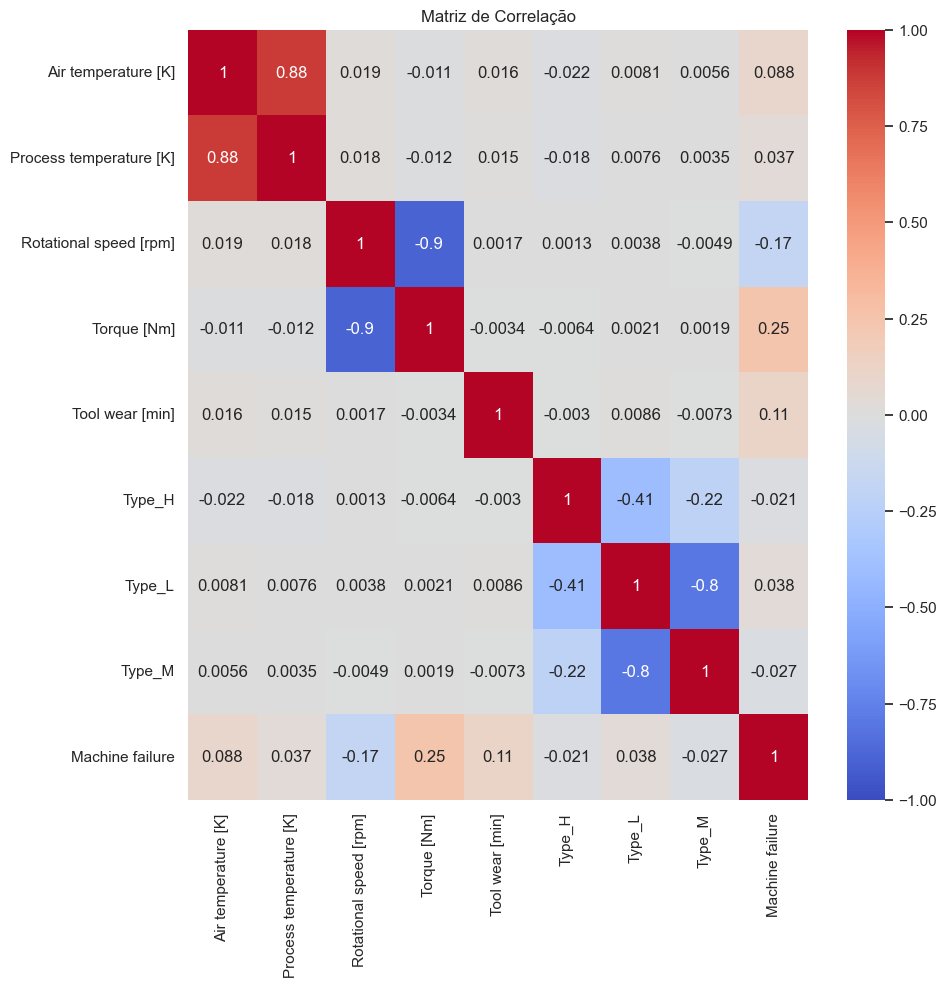

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

<font size="4" color="orange"><b>Avaliação de importancia das variáveis </b></font>

                   Feature  Importance
3              Torque [Nm]        0.29
0      Air temperature [K]        0.23
4          Tool wear [min]        0.16
1  Process temperature [K]        0.14
2   Rotational speed [rpm]        0.13
6                   Type_L        0.04
7                   Type_M        0.00
5                   Type_H        0.00


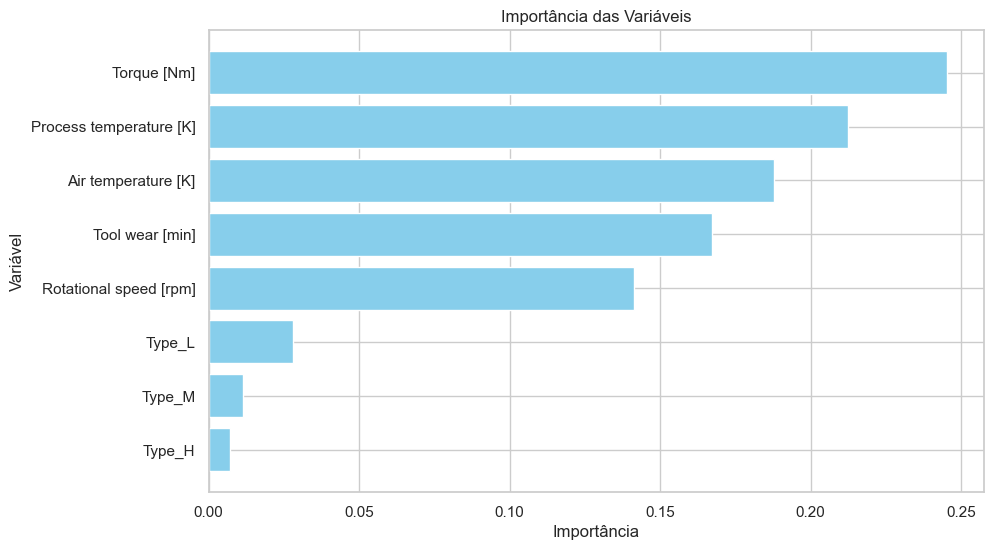

In [46]:

y = df_limpo_padronizado['Machine failure']
X = df_limpo_padronizado.drop(columns=['Machine failure'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Inicializar e treinar o classificador
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 4. Avaliar a importância das variáveis
importancia = clf.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualizar as importâncias
importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

# Mostrar as importâncias
print(importance_df)

# 5. Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importance'], color='skyblue')
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.gca().invert_yaxis()
plt.show()

<font size="4" color="orange"><b>Treinamento dos algoritmos de previsão</b></font>

<font size="4" color="orange"><b>Avaliando os melhores modelos utilizando o Lazy Predict</b></font>

In [18]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

# Dividir o conjunto de dados
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Padronização dos dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

reg = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=f1_score)
models_2, predictions = reg.fit(x_train_balanceado_3, x_test_scaled_3, y_train_balanceado_3, y_test_3)

# Ver os resultados dos modelos
print(models_2)

100%|██████████| 29/29 [00:29<00:00,  1.03s/it]

[LightGBM] [Info] Number of positive: 6677, number of negative: 6677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 13354, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.92               0.89     0.89      0.94   
LGBMClassifier                     0.97               0.88     0.88      0.97   
AdaBoostClassifier                 0.92               0.87     0.87      0.94   
XGBClassifier                      0.97               0.87     0.87      0.97   
NuSVC         

Algoritmos testados

1º Modelo - logisticregression - Scikitlearn

2º Modelo - logisticregression com gridsearch

3º Modelo - CVC 

4º Modelo - CVC com gridsearch

5º Modelo - LGBMClassifier

6º Modelo - LGBMClassifier com gridsearch

<font size="4" color="orange"><b>1º Modelo - Logistic Regression</b></font>

In [56]:

x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

# Dividir o conjunto de dados
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Padronização dos dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

logreg = LogisticRegression()
logreg.fit(x_train_3, y_train_3)
y_pred_logreg = logreg.predict(x_test_3)

print("\nRelatório de Classificação para Regressão Logística:")
print(classification_report(y_test_3, y_pred_logreg))
print("Acurácia da Regressão Logística:", f1_score(y_test_3, y_pred_logreg))


Relatório de Classificação para Regressão Logística:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2859
           1       0.83      0.17      0.28        88

    accuracy                           0.97      2947
   macro avg       0.90      0.58      0.63      2947
weighted avg       0.97      0.97      0.97      2947

Acurácia da Regressão Logística: 0.28301886792452824


<font size="4" color="orange"><b>2º Modelo - Rogistic Regression com gridsearch</b></font>

In [71]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Padronização dos dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

# Configuração dos hiperparâmetros para a busca em grade
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga']  
}

# Instanciando o LogisticRegression
logreg = LogisticRegression(max_iter=10000)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Executando o grid search
grid_search.fit(x_train_balanceado_3, y_train_balanceado_3)

# Melhor modelo encontrado pelo GridSearchCV
best_logreg = grid_search.best_estimator_

# Previsões com o melhor modelo
y_pred_logreg = best_logreg.predict(x_test_scaled_3)

# Calcular precisão e relatório de classificação
accuracy_logreg = accuracy_score(y_test_3, y_pred_logreg)
report_logreg = classification_report(y_test_3, y_pred_logreg)

# Imprimir resultados
print("\nLogisticRegression (Best Parameters):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_logreg}")
print(f"Classification Report:\n{report_logreg}\n")

Fitting 3 folds for each of 40 candidates, totalling 120 fits

LogisticRegression (Best Parameters):
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8411944350186631
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2854
           1       0.15      0.84      0.25        93

    accuracy                           0.84      2947
   macro avg       0.57      0.84      0.58      2947
weighted avg       0.97      0.84      0.89      2947




<font size="4" color="orange"><b>3º Modelo - CVC</b></font>

In [77]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Padronização dos dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

svc = SVC()
svc.fit(x_train_scaled_3, y_train_3)
y_pred_svc = svc.predict(x_test_scaled_3)
accuracy_svc = f1_score(y_test_3, y_pred_svc)
report_svc = classification_report(y_test_3, y_pred_svc)
print("SVC:")
print(f"Accuracy: {accuracy_svc}")
print(f"Classification Report:\n{report_svc}\n")

SVC:
Accuracy: 0.21505376344086022
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2865
           1       0.91      0.12      0.22        82

    accuracy                           0.98      2947
   macro avg       0.94      0.56      0.60      2947
weighted avg       0.97      0.98      0.97      2947




<font size="4" color="orange"><b>4º Modelo - CVC com gridsearch</b></font>

In [61]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

# Dividir o conjunto de dados
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Padronização dos dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Configurar o GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train_balanceado_3, y_train_balanceado_3)

# Predizer os valores com o melhor modelo encontrado
y_pred_svc = grid.predict(x_test_scaled_3)

print("\nMelhores parâmetros encontrados:")
print(grid.best_params_)

print("\nRelatório de Classificação para SVM:")
print(classification_report(y_test_3, y_pred_svm))
print("Acurácia do SVM:", accuracy_score(y_test_3, y_pred_svc))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s


KeyboardInterrupt: 

melhor algoritimo


<font size="4" color="orange"><b>5º Modelo - LGBMClassifier</b></font>

In [78]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

# Dividir o conjunto de dados
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Escalar os dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

# Treinar LGBMClassifier
lgbm = LGBMClassifier(class_weight='balanced')
lgbm.fit(x_train_balanceado_3, y_train_balanceado_3)

# Prever com LGBMClassifier
y_pred_lgbm = lgbm.predict(x_test_scaled_3)

# Calcular precisão e relatório de classificação
accuracy_lgbm = accuracy_score(y_test_3, y_pred_lgbm)
report_lgbm = classification_report(y_test_3, y_pred_lgbm)

# Imprimir resultados
print("LGBMClassifier:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Classification Report:\n{report_lgbm}\n")

[LightGBM] [Info] Number of positive: 6665, number of negative: 6665
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 13330, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier:
Accuracy: 0.9742110620970479
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2864
           1       0.53      0.81      0.64        83

    accuracy                           0.97      2947
   macro avg       0.76      0.89      0.81      2947
weighted avg       0.98      0.97      0.98      2947




<font size="4" color="orange"><b>6º Modelo - LGBMClassifier com gridsearch</b></font>

In [79]:
x_3 = df_limpo[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L','Type_H','Type_M']]
y_3 = df_limpo['Machine failure']

# Dividir o conjunto de dados
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3)

# Escalar os dados
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(x_train_3)
x_test_scaled_3 = scaler.transform(x_test_3)

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE()
x_train_balanceado_3, y_train_balanceado_3 = smote.fit_resample(x_train_scaled_3, y_train_3)

# Configuração dos hiperparâmetros para a busca em grade
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [10, 20, 30]
}

# Instanciando o LGBMClassifier
lgbm = LGBMClassifier(class_weight='balanced')

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Executando o grid search
grid_search.fit(x_train_balanceado_3, y_train_balanceado_3)

# Melhor modelo encontrado pelo GridSearchCV
best_lgbm = grid_search.best_estimator_

# Previsões com o melhor modelo
y_pred_lgbm = best_lgbm.predict(x_test_scaled_3)

# Calcular precisão e relatório de classificação
accuracy_lgbm = f1_score(y_test_3, y_pred_lgbm)
report_lgbm = classification_report(y_test_3, y_pred_lgbm)

# Imprimir resultados
print("LGBMClassifier (Best Parameters):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"F1-Score: {accuracy_lgbm}")
print(f"Classification Report:\n{report_lgbm}\n")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 6685, number of negative: 6685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 13370, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier (Best Parameters):
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 20}
F1-Score: 0.7534883720930232
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2844
           1       0.72      0.79      0.75       103

    accuracy                           0.98      2947
   macro avg 